# Bonus Track Assignment 1: In-depth analysis of particular cases
### Focus (at least) on the following neuro-computational features: Resonator, Integrator, Bistability.

For each of the considered features, provide a data vector/array representing the input that
led to the desired observed neuronal behavior and another vector/array that corresponds to
a case in which the desired neuronal behavior does not emerge.
Moreover, for each of the considered features, also write a brief comment in which you
explain why the neuronal behavior is not emerging in the second case.

In [74]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['axes.titlesize'] = 15 

## neuronplot(...)
### Is the same function of the Assignment1, but here there is the possibility to make a zoom on the phase portrait plot
Function that simulates the Izhikevich model and makes two plots (saving them in the 'plots' directory):
- membrane potential vs time + input current vs time
- phase portait i.e. recovery variable vs membrane potential

The function takes in input: 
- name of the feature 
- timestep duration (in ms)
- array of time instants 
- the 5 parameters of the Izhikevich model 
- the initial values of u and w 

and
- the boundary of the "zoom" on the phase plot (optional: by default set to None)

In [75]:
def neuronplot(feature,dt,t,I,a,b,c,d,u0,w0,xmin=None,xmax=None,ymin=None,ymax=None):

    fig = plt.figure(figsize = (20, 10))
    ax0 = fig.add_subplot(121) 
    ax2 = fig.add_subplot(122) 

    fig.suptitle(feature, fontsize = 18)
    ax0.title.set_text('Membrane Potential Time Course')
    ax2.title.set_text('Phase Portrait')

    ax0.plot(t,I, color = 'r')
    ax0.set_xlabel('time [ms]')
    ax0.set_ylabel('Input Current [pA]', color = 'r')
    ax0.tick_params(axis = "y", labelcolor='r')
    u=np.zeros(len(t))
    w=np.zeros(len(t))

    #initial values
    u[0] = u0 
    w[0] = w0

    #numerical integration using leapfrog method
    #we  distinguish the case (L) from the others because its equations are slightly different

    if (feature == '(L) Integrator-Desired Behavior') or (feature == '(L) Integrator-Not Desired Behavior'):
        for j in range (0,len(t)-1):

            u[j+1] = u[j]+dt*(0.04*(u[j])**2+4.1*u[j]+108-w[j]+I[j])
            w[j+1] = w[j]+dt*a*(b*u[j+1]-w[j])
            
            if u[j] > 30:
                u[j] = 30
                u[j+1] = c
                w[j+1] = w[j] + d

    else: 
        for j in range (0,len(t)-1):

            u[j+1] = u[j]+dt*(0.04*(u[j])**2+5*u[j]+140-w[j]+I[j])
            w[j+1] = w[j]+dt*a*(b*u[j+1]-w[j])
            
            if u[j] > 30:
                u[j] = 30
                u[j+1] = c
                w[j+1] = w[j] + d

    ax1=ax0.twinx()
    ax1.plot(t,u, color = 'b')
    ax1.set_ylabel('Membrane Potential [mv]', color = 'b')
    ax1.tick_params(axis = "y", labelcolor = 'b')

    ax2.plot(u,w, color = 'b')
    ax2.set(xlabel = 'Membrane Potential [mV]', ylabel = 'Recovery Variable [a.u.]')

    ax2.set_xlim([xmin,xmax])
    ax2.set_ylim([ymin,ymax])

    plt.tight_layout()
    plt.savefig(f"plots/{feature}.pdf")
    plt.show()

# Resonator:
### Desired Neuronal Behavior

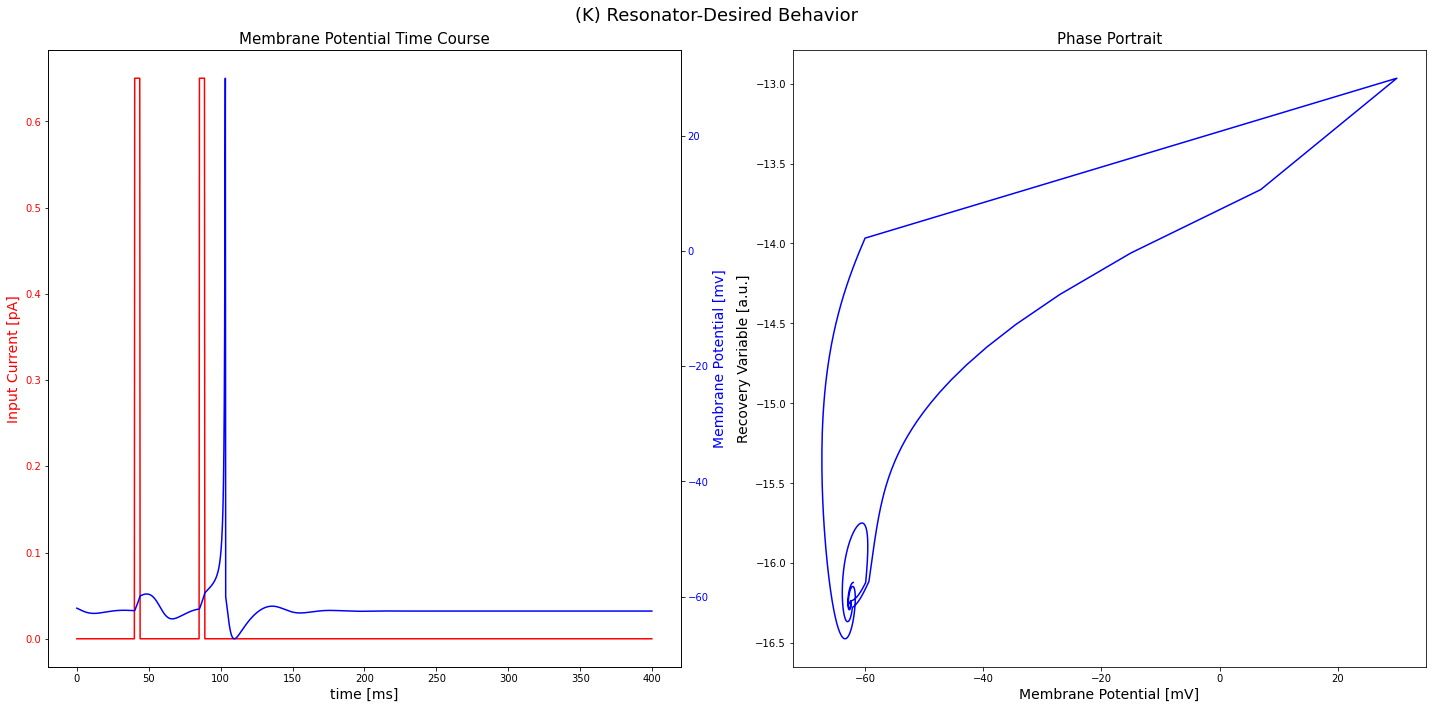

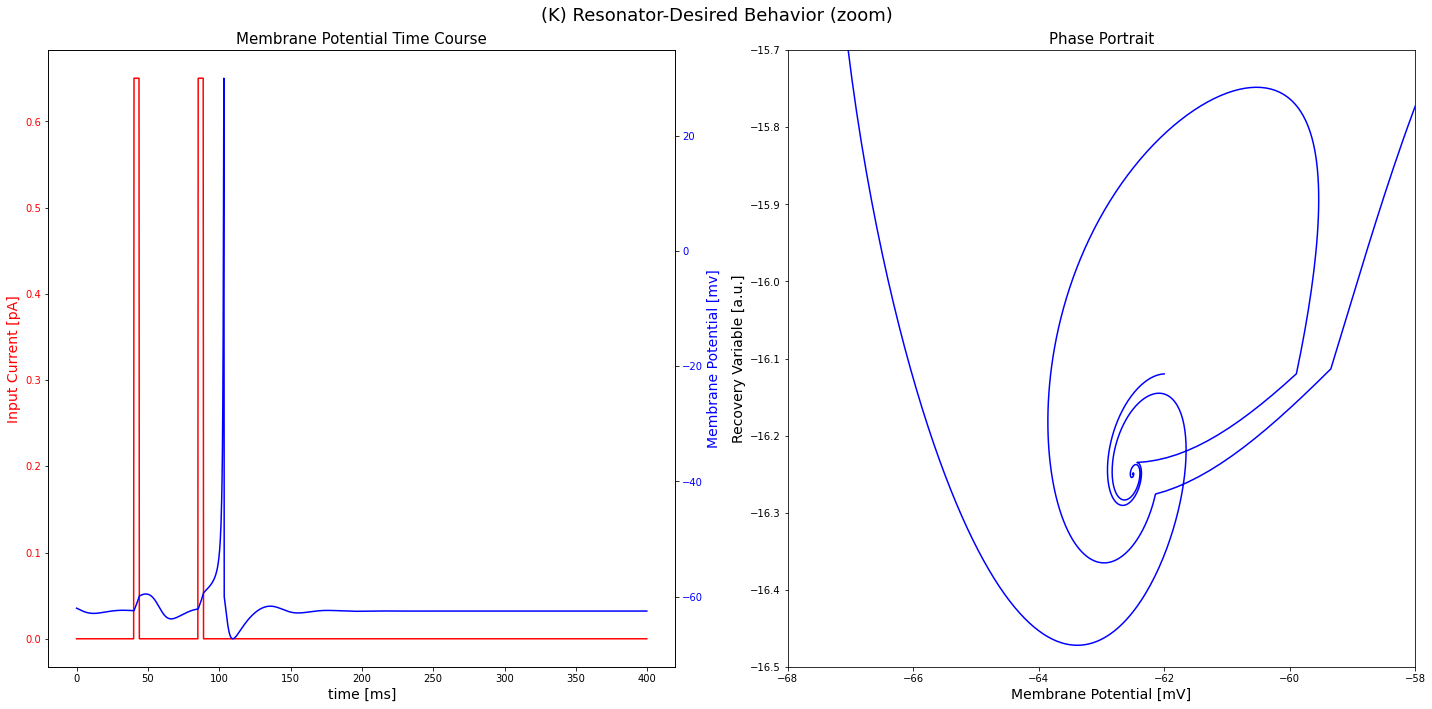

In [76]:
#(K) Resonator
feature = '(K) Resonator-Desired Behavior'
dt=0.25 #timestep [ms]
tmax=400 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/10)
t2=t1+45
I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +4) | (t[j] > t2 and t[j] < t2 +4) :
        I[j] = 0.65
        
#initial conditions
a=0.1
b=0.26
c=-60
d=-1
u0=-62
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# make a zoom
feature = '(K) Resonator-Desired Behavior (zoom)'

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0,xmin=-68,xmax=-58,ymin=-16.5,ymax=-15.7)

Resonators exhibit complex behaviors, in particular, they are not characterized by well defined thresholds.
In this case, the input current is two pulses of 0.65 pA, separated by a 45 ms interval. This combination is favorable to trigger the action potential.

We can make a zoom on the phase portrait plot to better understand the dynamics before the spike is triggered. If we follow the trajectory on the phase space, we can see that the second pulse happens "in phase" with the first. The first pulse generates a sort of spiral on the phase space; the second pulse happens when we are on the "right" of the phase space on this spiral (at around -62.5 mV), as a consequence, it is easy to generate a spike.

# Resonator:
### Case in which the desired neuronal behavior doesn't emerge

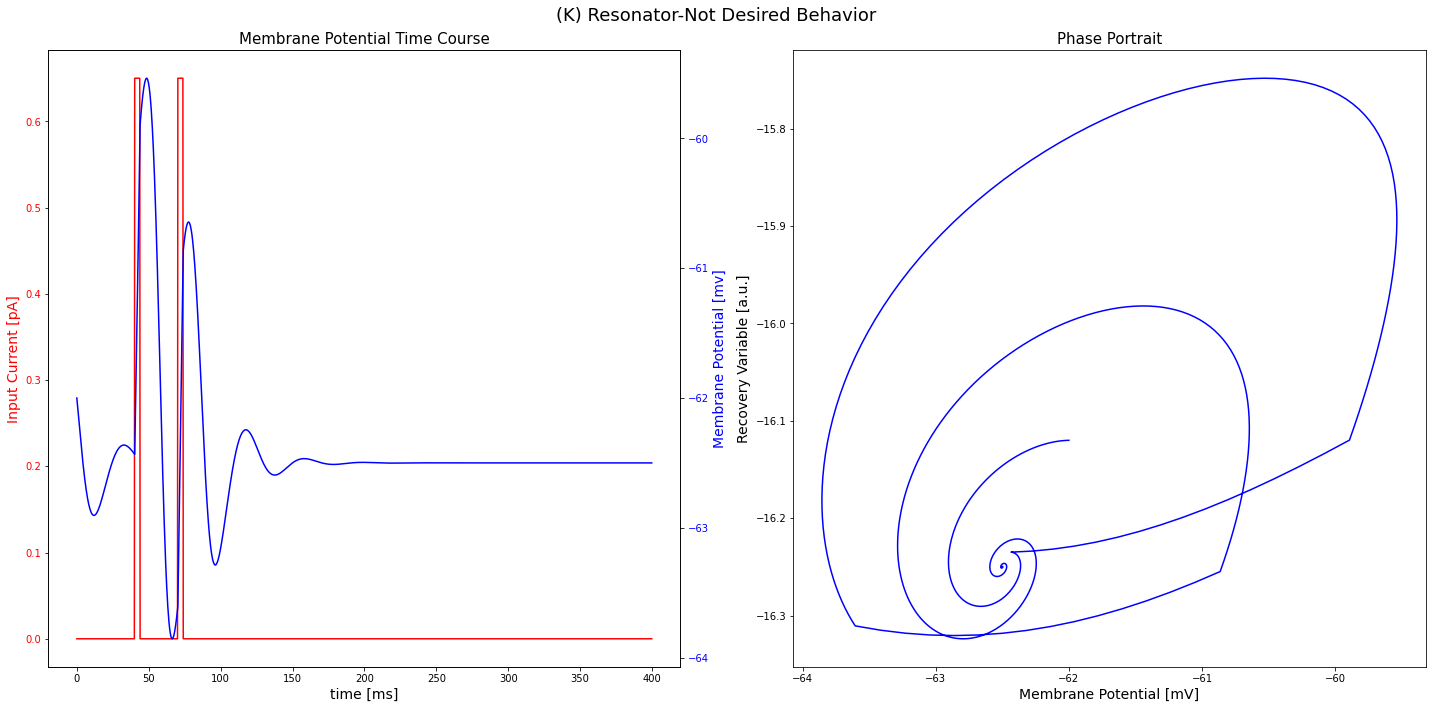

In [77]:
#(K) Resonator
feature = '(K) Resonator-Not Desired Behavior'
dt=0.25 #timestep [ms]
tmax=400 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/10)
t2=t1+30
I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +4) | (t[j] > t2 and t[j] < t2 +4) :
        I[j] = 0.65
        
#initial conditions
a=0.1
b=0.26
c=-60
d=-1
u0=-62
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

In this case, we only changed the time interval between the two current pulses, now set to 30 ms. It is evident that now the neuron does not fire. In resonators, the timing between input pulses is crucial: in order to trigger the action potential, the second pulse should be "in phase" with the first one. 

If we look at the phase portrait of this second case, it can be seen that the second pulse (which intuitively corresponds to a "kick" to the right), happens when the membrane potential is more negative (around -63.6 mV); as a consequence, its timing is not favorable to trigger a spike. 
Conversely, in the previous plot, the second pulse happens when the membrane potential is more positive (to the right), so it is able to trigger the spike.

# Integrator:
### Desired Neuronal Behavior

L


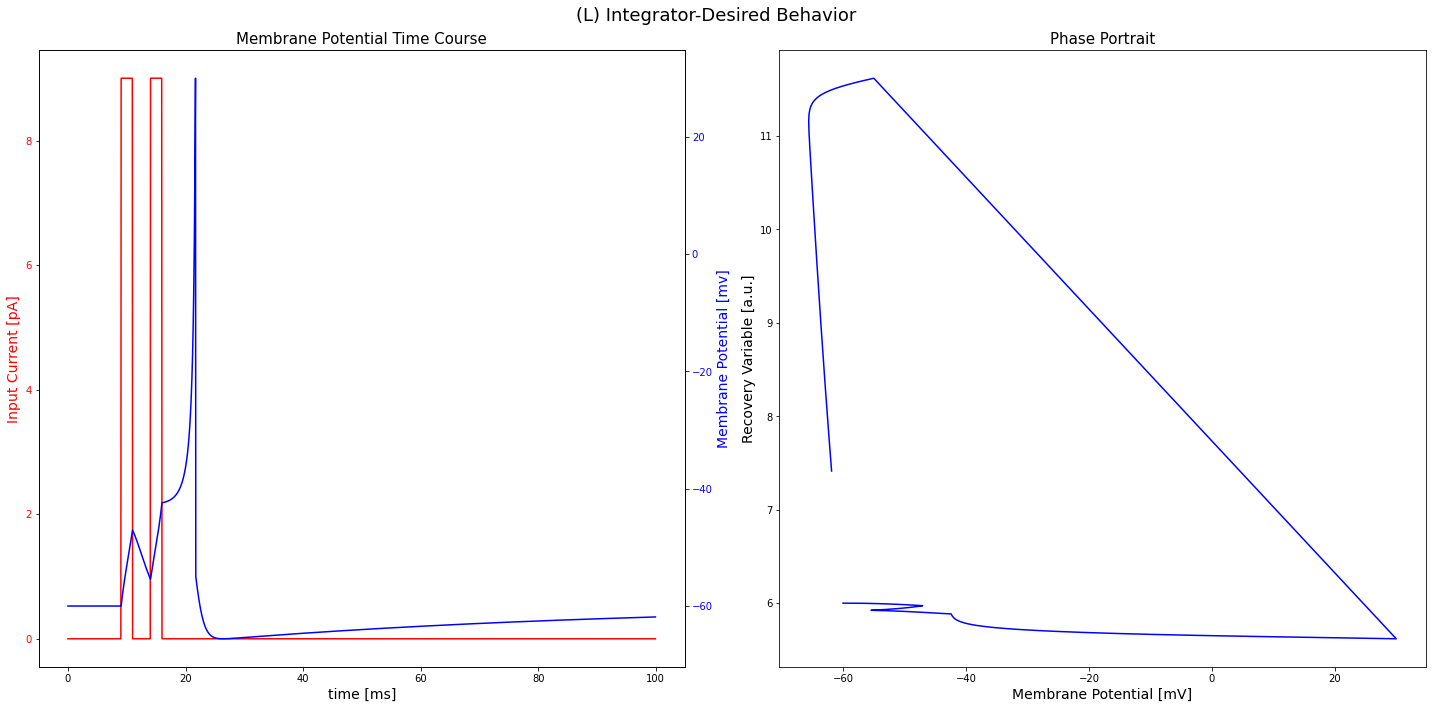

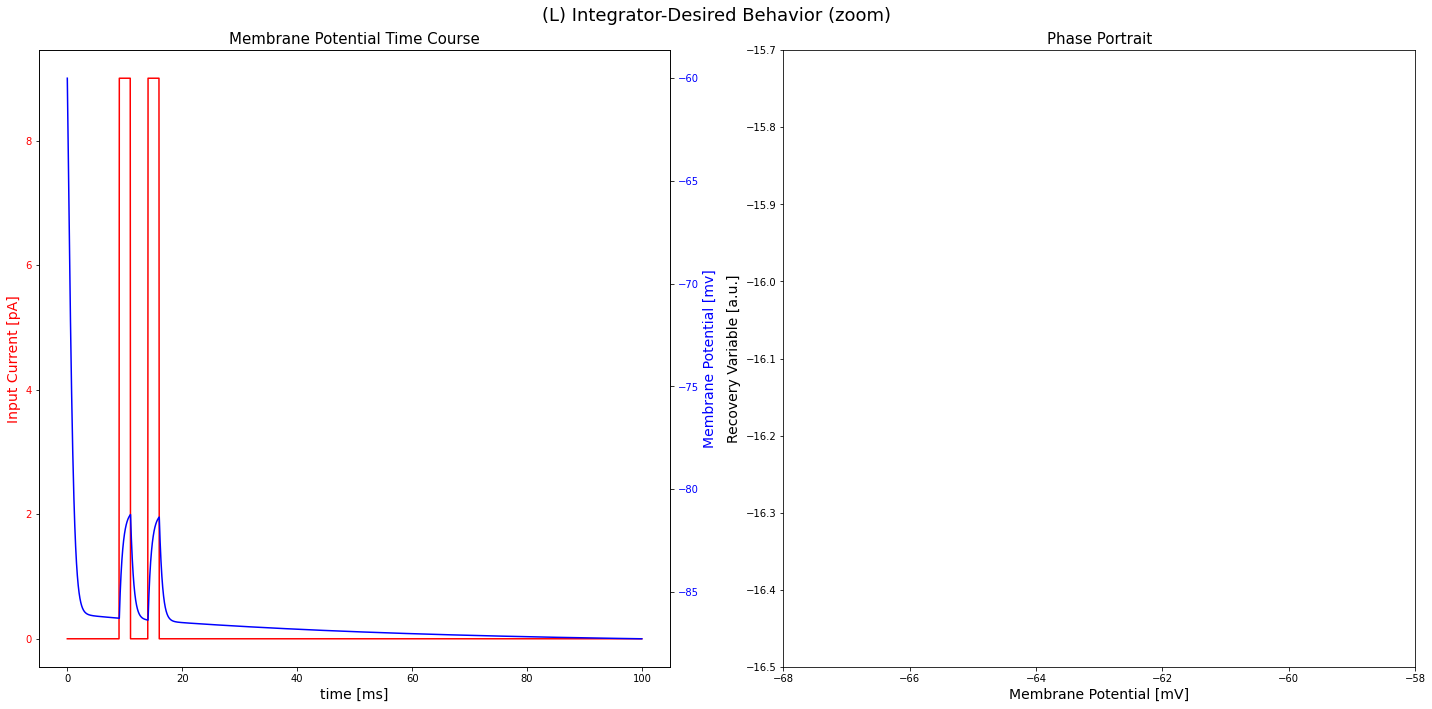

In [84]:
#(L) Integrator
feature = '(L) Integrator-Desired Behavior'
dt=0.05 #timestep [ms]
tmax=100 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/11)
t2=t1+5
I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +2) | (t[j] > t2 and t[j] < t2 +2) :
        I[j] = 9
        
#initial conditions
a=0.02
b=-0.1
c=-55
d=6
u0=-60
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)



Integrators are sensible to spikes that are almost coincident with each other.

 In this first case, the input consists of two current pulses (each of duration 2 ms) of 9 pA, injected at a temporal distance of 5 ms. The pulses are sufficiently close in order for the Integrator to trigger a spike: the integration of the contributes of both pulses results in an action potential.

# Integrator:
### Case in which the desired neuronal behavior doesn't emerge

L


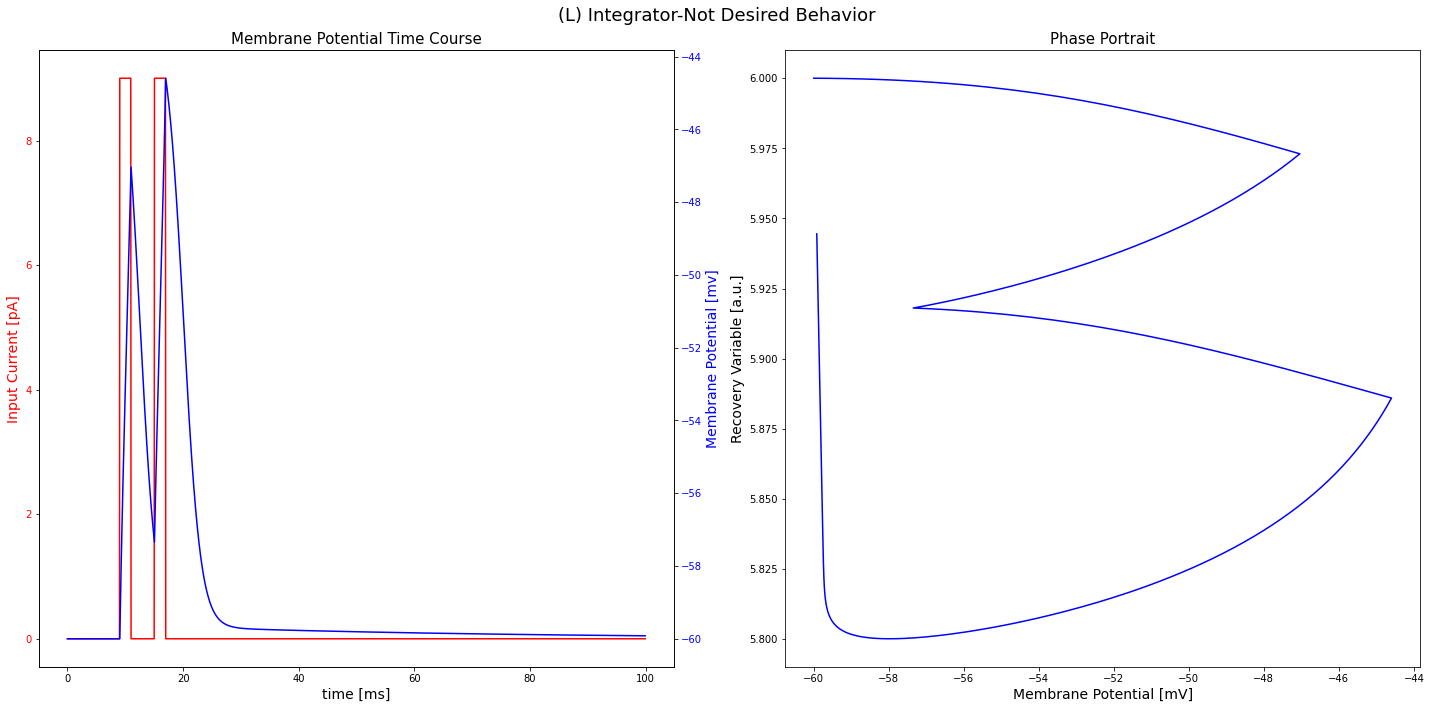

In [83]:
#(L) Integrator
feature = '(L) Integrator-Not Desired Behavior'
dt=0.05 #timestep [ms]
tmax=100 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/11)
t2=t1+6
I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +2) | (t[j] > t2 and t[j] < t2 +2) :
        I[j] = 9
        
#initial conditions
a=0.02
b=-0.1
c=-55
d=6
u0=-60
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

If the two pulses (always of 9 pA) are farther from each other (in this case 6 ms), due to relaxation effects the neuron does not trigger the action potential, resulting only in a subtreshold activity. Note that the scale of the Membrane Potential is much different compared to the previous plot. 

# Bistability:
### Desired Neuronal Behavior

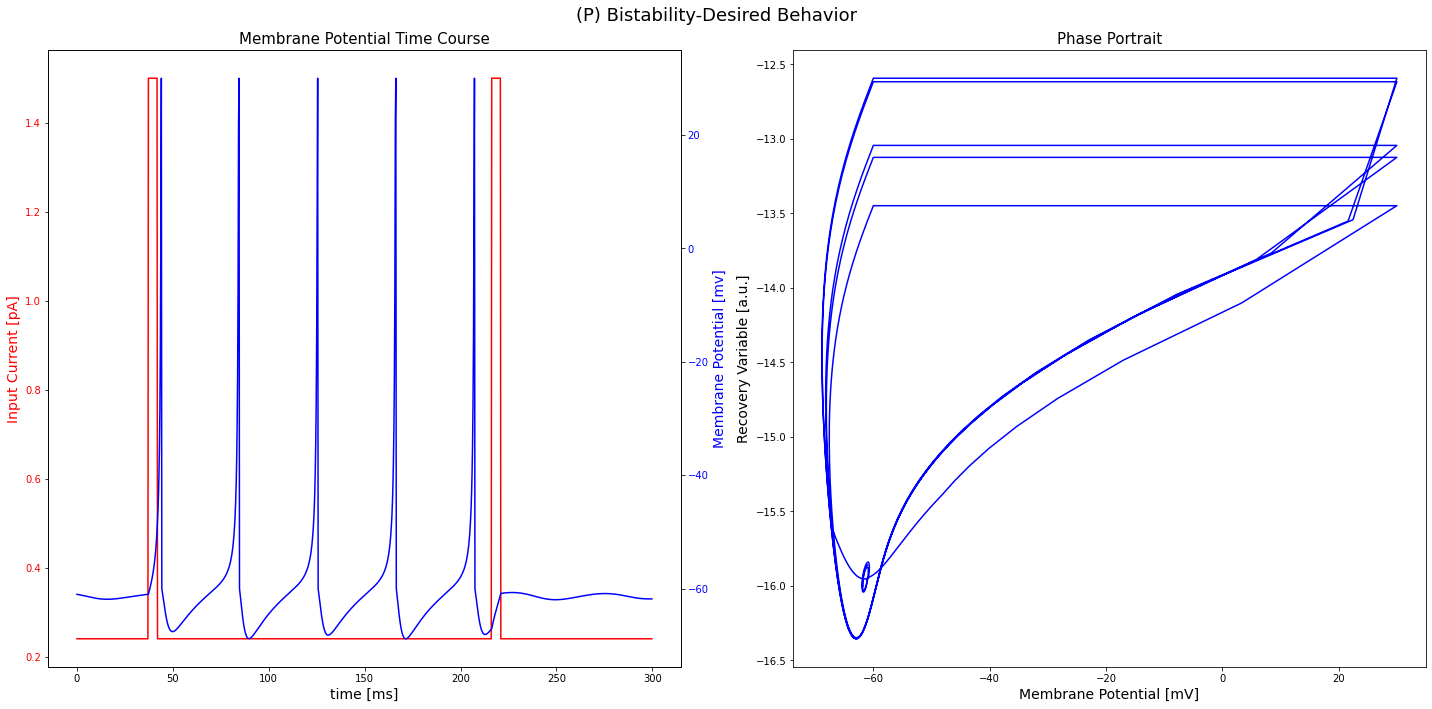

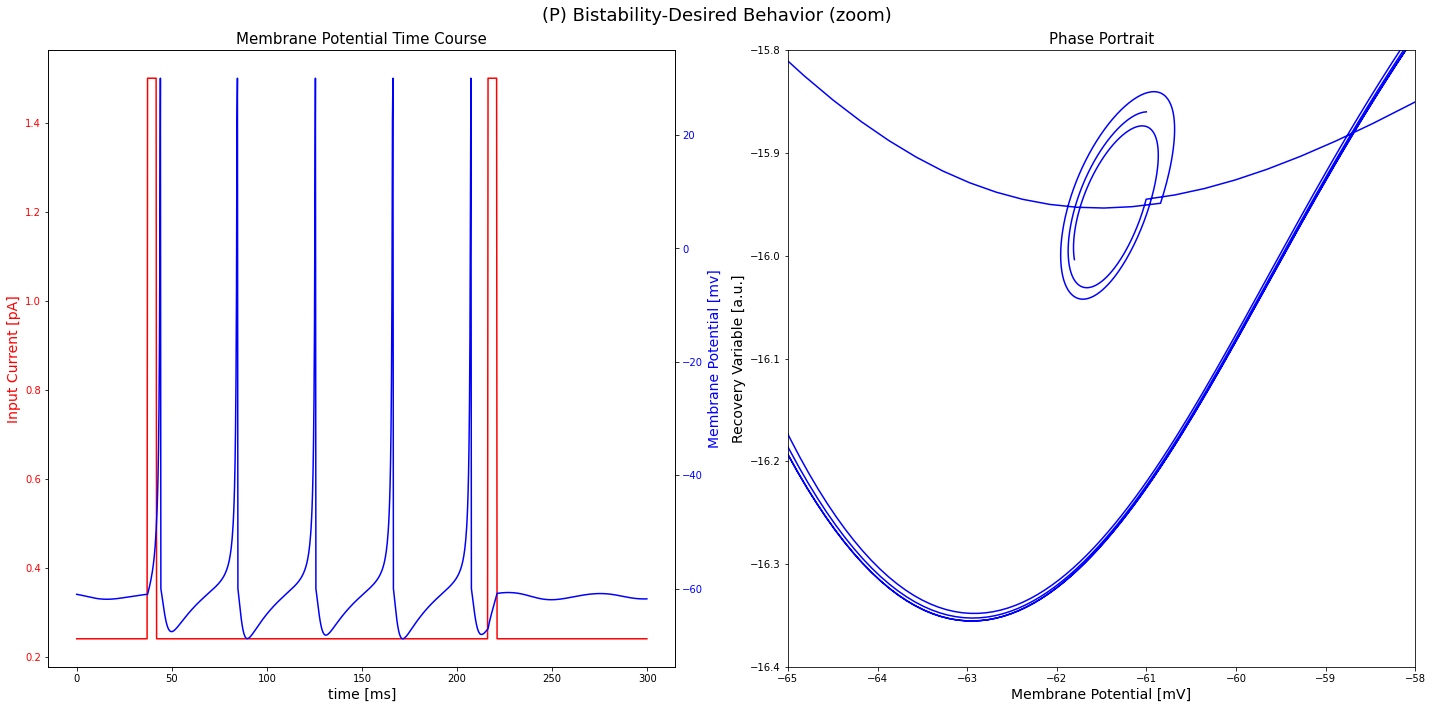

In [88]:
#(P) Bistability
feature = '(P) Bistability-Desired Behavior'
dt=0.25 #timestep [ms]
tmax=300 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/8)
t2=216

I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +5) | (t[j] > t2 and t[j] < t2 +5) :
        I[j] = 1.5
    else:
        I[j]=0.24
        
#initial conditions
a=0.1
b=0.26
c=-60
d=0
u0=-61
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

feature = '(P) Bistability-Desired Behavior (zoom)'

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0,xmin=-65,xmax=-58,ymin=-16.4,ymax=-15.8)

The input consists of two current pulses (each of duration 5 ms) of 0.24 pA, at a temporal distance of 216 ms. The first pulse triggers a spiking behaviour, untill a carefully timed second pulse stops the spiking.

If we look at the zoom of the phase portrait, we can see the moments when the first spike makes the state of the neuron enter the limit cycle of spiking activity and also when the second spike makes it return to the resting state node, with some small oscillations.

# Bistability:
### Case in which the desired neuronal behavior doesn't emerge

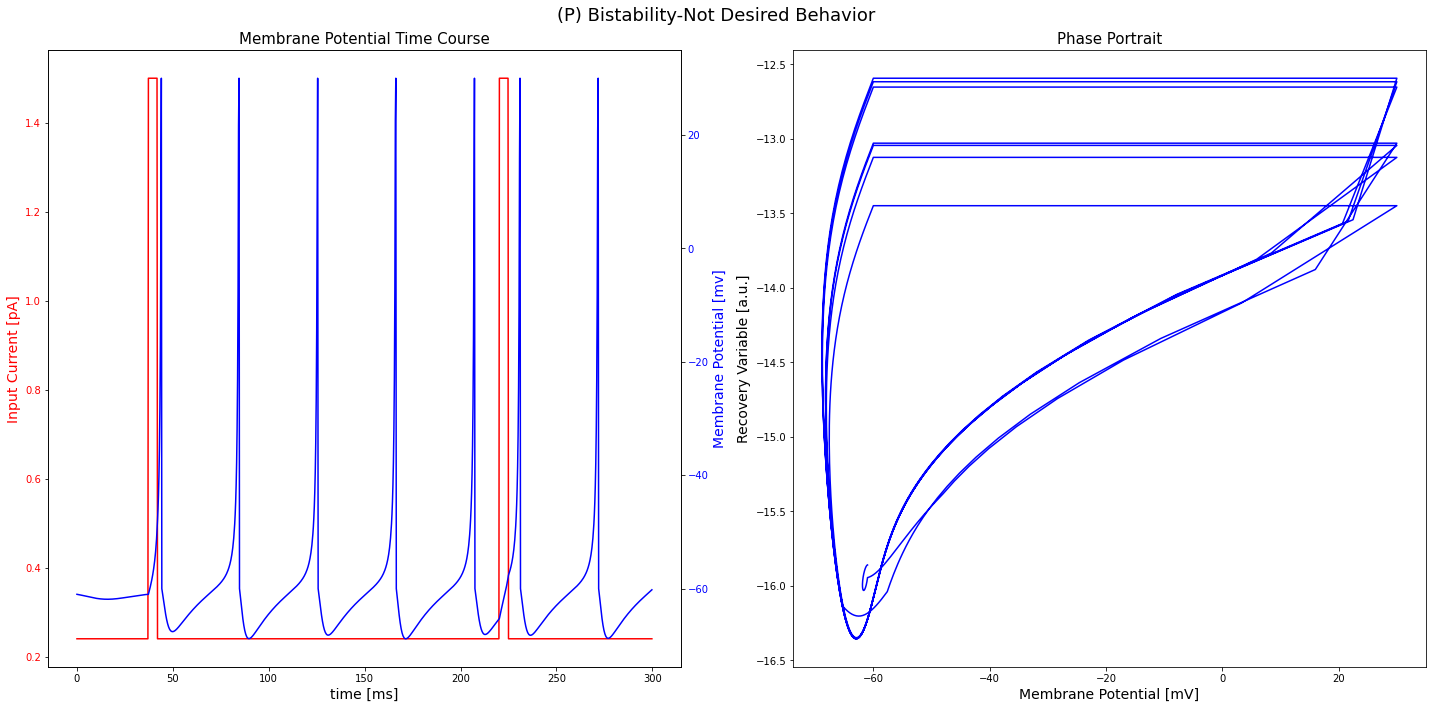

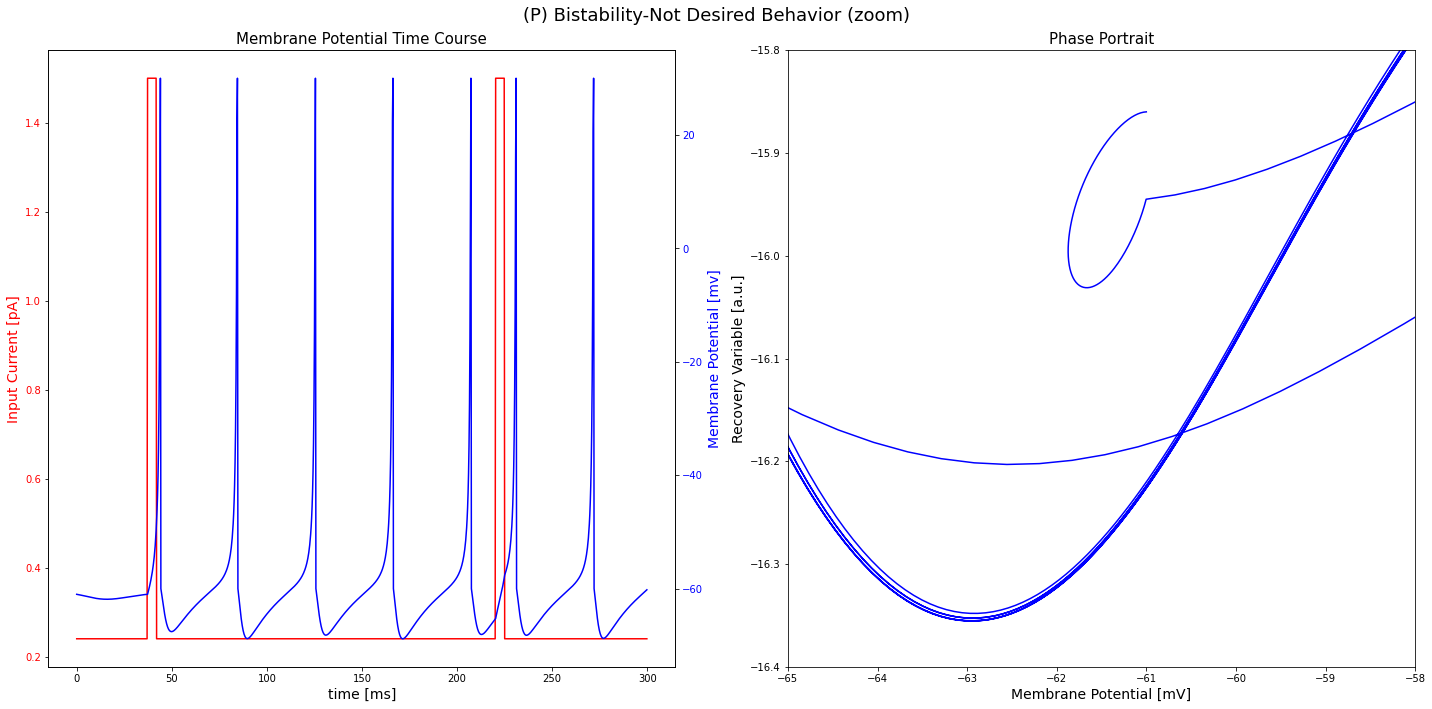

In [89]:
###
#(P) Bistability
feature = '(P) Bistability-Not Desired Behavior'
dt=0.25 #timestep [ms]
tmax=300 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/8)
t2=220

I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +5) | (t[j] > t2 and t[j] < t2 +5) :
        I[j] = 1.5
    else:
        I[j]=0.24
        
#initial conditions
a=0.1
b=0.26
c=-60
d=0
u0=-61
w0=b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

feature = '(P) Bistability-Not Desired Behavior (zoom)'

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0,xmin=-65,xmax=-58,ymin=-16.4,ymax=-15.8)

In this case the timing is crucial as well. If we change the interval between the two pulses (now 220 ms), the second pulse is not able to stop the spiking behavior of the neuron.

We can see from the zoom that after the state exits the resting node, it enters the spiking limit cycle and never leaves it.